Aim of this document is to plot different variables into histograms and 2d scatter plots.
Variables to plot:
1. Total energy of the lepton pair $E_{ll}$.
2. Dilepton Invariant Mass, $M_{ll}$
3. dilepton transverse momentum, $P_T^{ll}$
4. Jet Energies above 20 GeV + Num of jets above 20 GeV etc
5. Polar Angle of the dilepton pair, $\Theta_{ll}$.
6. Missing energy, $E_T^{miss}$.
7. Angle of the leptons to the beam direction.
8. Differences in the angle (maybe pseudo-rapidity?).

Note that these plots have not been normalized to the integrated luminosity of Run 3 yet.
I think I might need to make more data for this BP point (BP8) to make the curves more even, 
I can then just normalize everything to the correct int lum. 

In [3]:
import ROOT
import matplotlib.pyplot as plt
from ROOT import TF1
ROOT.gSystem.Load("/vols/cms/emc21/FCC/Delphes-3.5.0/libDelphes.so")
ROOT.gInterpreter.Declare('#include "/vols/cms/emc21/FCC/Delphes-3.5.0/classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "/vols/cms/emc21/FCC/Delphes-3.5.0/external/ExRootAnalysis/ExRootTreeReader.h"')

True

In [10]:
inputFile = '/vols/cms/emc21/FCC/MG5_aMC_v2_6_7/myruns/distributions/pp_h2h2lPlMBP8/Events/run_01_0/tag_1_delphes_events.root'

# Load in all the data files
# Create chain of root trees
chain = ROOT.TChain("Delphes")
for i in range(10):
    chain.Add(f'/vols/cms/emc21/FCC/MG5_aMC_v2_6_7/myruns/distributions/pp_h2h2lPlMBP8/Events/run_01_{i}/tag_1_delphes_events.root')




Warning in <TROOT::Append>: Replacing existing TH1: eM (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: muM (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasName


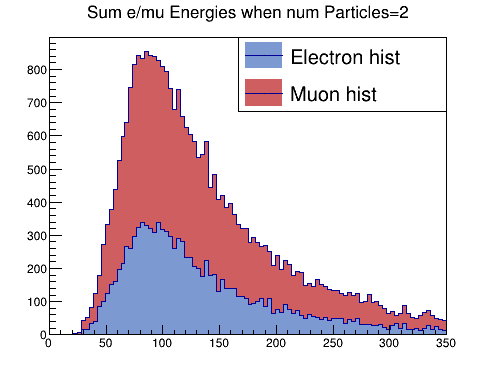

In [8]:
"""Histogram of the sum of the two electron and muon energies
(if there is 2 of either in an event)"""
# Create object of class ExRootTreeReader
treeReader = ROOT.ExRootTreeReader(chain)
numberOfEntries = treeReader.GetEntries()

min = 0.0
max = 350.0
histEe = ROOT.TH1F("eM", "M", 100, min, max)
histEe.SetFillColor(38)
histEMU = ROOT.TH1F("muM", "M", 100, min, max)
histEMU.SetFillColor(46)

histStack = ROOT.THStack("sum", "Sum e/mu Energies when num Particles=2")


branchElectron = treeReader.UseBranch("Electron")
branchMuon = treeReader.UseBranch("Muon")

# Loop over all events
for entry in range(0, numberOfEntries):
    # Load selected branches with data from specified event
    treeReader.ReadEntry(entry)
    #print(f"num E = {branchElectron.GetEntries()}")
    #print(f"num M = {branchMuon.GetEntries()}\n")
    if branchElectron.GetEntries() > 1:
        # Take first two electrons
        elec1 = branchElectron.At(0)
        elec2 = branchElectron.At(1)
        # Plot their invariant mass
        #histE.Fill(((elec1.P4()) + (elec2.P4())).M())
        histEe.Fill((elec1.P4().E()) + (elec2.P4().E()))

    if branchMuon.GetEntries() > 1:
        # Take first two electrons
        part1 = branchMuon.At(0)
        part2 = branchMuon.At(1)
        # Plot their invariant mass
        #histE.Fill(((part1.P4()) + (part2.P4())).M())
        histEMU.Fill((part1.P4().E()) + (part2.P4().E()))

histStack.Add(histEe)
histStack.Add(histEMU)

# Show resulting histograms
c = ROOT.TCanvas("canvasName", "title", 500, 400)
histStack.Draw()

#histEe.Draw("SAME")
#histEMU.Draw("SAME")
c.Draw()

legend = ROOT.TLegend(0.9,0.7,0.48,0.9)
legend.AddEntry(histEe, "Electron hist")
legend.AddEntry(histEMU, "Muon hist")
legend.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: eM (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: muM (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasName


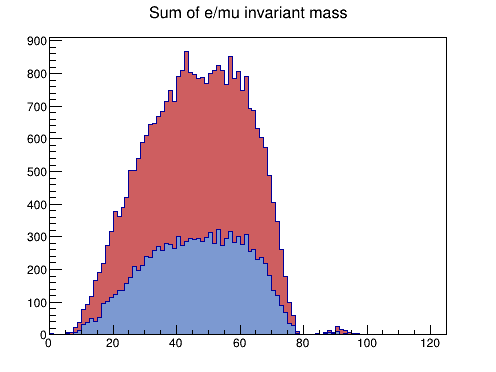

In [34]:
"""Invariant Mass of e/mu pair"""
# Create object of class ExRootTreeReader
treeReader = ROOT.ExRootTreeReader(chain)
numberOfEntries = treeReader.GetEntries()

min = 0.0
max = 125.0
histMe = ROOT.TH1F("eM", "M", 100, min, max)
histMe.SetFillColor(38)
histMMU = ROOT.TH1F("muM", "M", 100, min, max)
histMMU.SetFillColor(46)

histStack = ROOT.THStack("sum", "Sum of e/mu invariant mass")


branchElectron = treeReader.UseBranch("Electron")
branchMuon = treeReader.UseBranch("Muon")

# Loop over all events
for entry in range(0, numberOfEntries):
    # Load selected branches with data from specified event
    treeReader.ReadEntry(entry)
    #print(f"num E = {branchElectron.GetEntries()}")
    #print(f"num M = {branchMuon.GetEntries()}\n")
    if branchElectron.GetEntries() > 1:
        # Take first two electrons
        elec1 = branchElectron.At(0)
        elec2 = branchElectron.At(1)
        # Plot their invariant mass
        #histM.Fill(((elec1.P4()) + (elec2.P4())).M())
        histMe.Fill(((elec1.P4()) + (elec2.P4())).M())

    if branchMuon.GetEntries() > 1:
        # Take first two electrons
        part1 = branchMuon.At(0)
        part2 = branchMuon.At(1)
        # Plot their invariant mass
        #histM.Fill(((part1.P4()) + (part2.P4())).M())
        histMMU.Fill(((part1.P4()) + (part2.P4())).M())

histStack.Add(histMe)
histStack.Add(histMMU)

# Show resulting histograms
c = ROOT.TCanvas("canvasName", "title", 500, 400)
histStack.Draw()

#histMe.Draw("SAME")
#histMMU.Draw("SAME")
c.Draw()

# legend = ROOT.TLegend(0.9,0.7,0.48,0.9)
# legend.SetHeader("Particle")
# legend.AddEntry(histMe, "Electron hist")
# legend.AddEntry(histMMU, "Muon hist")
# legend.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: eM (Potential memory leak).
Error in <TColor::GetColorTransparent>: color with index 3004 not defined
Warning in <TROOT::Append>: Replacing existing TH1: muM (Potential memory leak).
Error in <TColor::GetColorTransparent>: color with index 3023 not defined
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasName


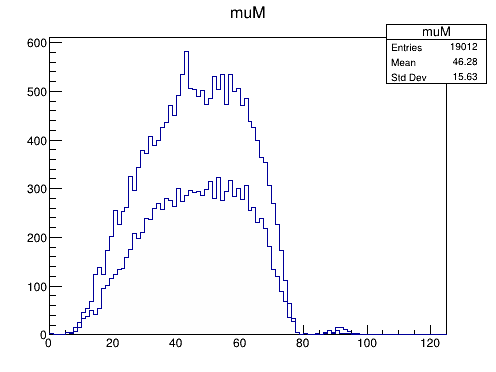

In [39]:
"""Invariant Mass of e/mu pair"""
# Create object of class ExRootTreeReader
treeReader = ROOT.ExRootTreeReader(chain)
numberOfEntries = treeReader.GetEntries()

min = 0.0
max = 125.0
histMe = ROOT.TH1F("eM", "eM", 100, min, max)
#histMe.SetFillColor(38)
histMe.SetFillColorAlpha(3004, 0.35)
histMMU = ROOT.TH1F("muM", "muM", 100, min, max)
#histMMU.SetFillColor(46)
histMe.SetFillColorAlpha(3023, 0.7)

#histStack = ROOT.THStack("sum", "Sum of e/mu invariant mass")


branchElectron = treeReader.UseBranch("Electron")
branchMuon = treeReader.UseBranch("Muon")

# Loop over all events
for entry in range(0, numberOfEntries):
    # Load selected branches with data from specified event
    treeReader.ReadEntry(entry)
    #print(f"num E = {branchElectron.GetEntries()}")
    #print(f"num M = {branchMuon.GetEntries()}\n")
    if branchElectron.GetEntries() > 1:
        # Take first two electrons
        elec1 = branchElectron.At(0)
        elec2 = branchElectron.At(1)
        # Plot their invariant mass
        #histM.Fill(((elec1.P4()) + (elec2.P4())).M())
        histMe.Fill(((elec1.P4()) + (elec2.P4())).M())

    if branchMuon.GetEntries() > 1:
        # Take first two electrons
        part1 = branchMuon.At(0)
        part2 = branchMuon.At(1)
        # Plot their invariant mass
        #histM.Fill(((part1.P4()) + (part2.P4())).M())
        histMMU.Fill(((part1.P4()) + (part2.P4())).M())

#histStack.Add(histMe)
#histStack.Add(histMMU)

# Show resulting histograms
c = ROOT.TCanvas("canvasName", "title", 500, 400)
#histStack.Draw()
histMMU.Draw()
histMe.Draw("SAME")
c.Draw()

# legend = ROOT.TLegend(0.9,0.7,0.48,0.9)
# legend.SetHeader("Particle")
# legend.AddEntry(histMe, "Electron hist")
# legend.AddEntry(histMMU, "Muon hist")
# legend.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: eM (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: muM (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasName


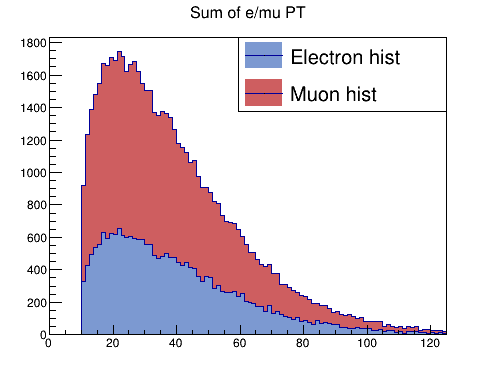

In [40]:
"""histograms of the e/mu transverse momenta
i.e. plotting both the e+ and e-"""
# Create object of class ExRootTreeReader
treeReader = ROOT.ExRootTreeReader(chain)
numberOfEntries = treeReader.GetEntries()

min = 0.0
max = 125.0
histPTe = ROOT.TH1F("eM", "M", 100, min, max)
histPTe.SetFillColor(38)
histPTMU = ROOT.TH1F("muM", "M", 100, min, max)
histPTMU.SetFillColor(46)

histStack = ROOT.THStack("sum", "Sum of e/mu PT")


branchElectron = treeReader.UseBranch("Electron")
branchMuon = treeReader.UseBranch("Muon")

# Loop over all events
for entry in range(0, numberOfEntries):
    # Load selected branches with data from specified event
    treeReader.ReadEntry(entry)
    #print(f"num E = {branchElectron.GetEntries()}")
    #print(f"num M = {branchMuon.GetEntries()}\n")
    if branchElectron.GetEntries() > 1:
        # Take first two electrons
        elec1 = branchElectron.At(0)
        elec2 = branchElectron.At(1)
        histPTe.Fill(elec1.PT)
        histPTe.Fill(elec2.PT)

    if branchMuon.GetEntries() > 1:
        # Take first two electrons
        part1 = branchMuon.At(0)
        part2 = branchMuon.At(1)
        histPTMU.Fill(part1.PT)
        histPTMU.Fill(part2.PT)


histStack.Add(histPTe)
histStack.Add(histPTMU)

# Show resulting histograms
c = ROOT.TCanvas("canvasName", "title", 500, 400)
histStack.Draw()

#histPTe.Draw("SAME")
#histPTMU.Draw("SAME")
c.Draw()

legend = ROOT.TLegend(0.9,0.7,0.48,0.9)
legend.AddEntry(histPTe, "Electron hist")
legend.AddEntry(histPTMU, "Muon hist")
legend.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: eM (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: muM (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasName


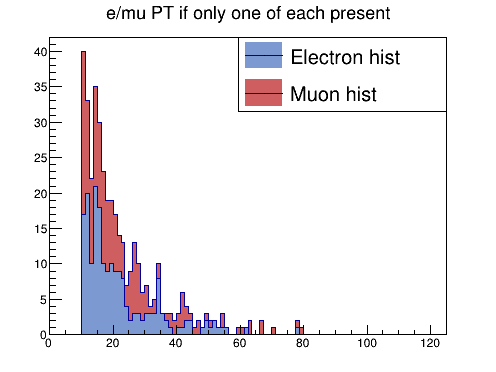

In [42]:
"""histogram of electron AND muon PT if ONLY 1 each particle present.
I think this could be from the decay of two taus to an e+mu"""
# Create object of class ExRootTreeReader
treeReader = ROOT.ExRootTreeReader(chain)
numberOfEntries = treeReader.GetEntries()

min = 0.0
max = 125.0
histPTe = ROOT.TH1F("eM", "M", 100, min, max)
histPTe.SetFillColor(38)
histPTMU = ROOT.TH1F("muM", "M", 100, min, max)
histPTMU.SetFillColor(46)

histStack = ROOT.THStack("sum", "e/mu PT if only one of each present")


branchElectron = treeReader.UseBranch("Electron")
branchMuon = treeReader.UseBranch("Muon")

# Loop over all events
for entry in range(0, numberOfEntries):
    # Load selected branches with data from specified event
    treeReader.ReadEntry(entry)
    #print(f"num E = {branchElectron.GetEntries()}")
    #print(f"num M = {branchMuon.GetEntries()}\n")
    if branchElectron.GetEntries() == 1 and branchMuon.GetEntries() == 1:
        # Take first two electrons
        elec1 = branchElectron.At(0)
        histPTe.Fill(elec1.PT)
        mu1 = branchMuon.At(0)
        histPTMU.Fill(mu1.PT)



histStack.Add(histPTe)
histStack.Add(histPTMU)

# Show resulting histograms
c = ROOT.TCanvas("canvasName", "title", 500, 400)
histStack.Draw()

#histPTe.Draw("SAME")
#histPTMU.Draw("SAME")
c.Draw()

legend = ROOT.TLegend(0.9,0.7,0.48,0.9)
legend.AddEntry(histPTe, "Electron hist")
legend.AddEntry(histPTMU, "Muon hist")
legend.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: eM (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: muM (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasName


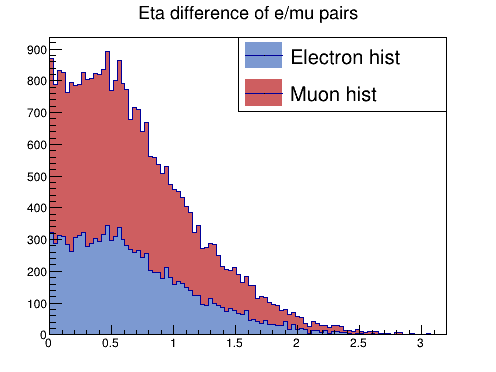

In [44]:
"""histogram of the difference in eta of the two e or mu"""

# Create object of class ExRootTreeReader
treeReader = ROOT.ExRootTreeReader(chain)
numberOfEntries = treeReader.GetEntries()

min = 0.0
max = 3.2
histEtaDiffe = ROOT.TH1F("eM", "M", 100, min, max)
histEtaDiffe.SetFillColor(38)
histEtaDiffMU = ROOT.TH1F("muM", "M", 100, min, max)
histEtaDiffMU.SetFillColor(46)

histStack = ROOT.THStack("sum", "Eta difference of e/mu pairs")


branchElectron = treeReader.UseBranch("Electron")
branchMuon = treeReader.UseBranch("Muon")

# Loop over all events
for entry in range(0, numberOfEntries):
    # Load selected branches with data from specified event
    treeReader.ReadEntry(entry)
    #print(f"num E = {branchElectron.GetEntries()}")
    #print(f"num M = {branchMuon.GetEntries()}\n")
    if branchElectron.GetEntries() > 1:
        # Take first two electrons
        elec1 = branchElectron.At(0)
        elec2 = branchElectron.At(1)
        diff = abs(elec1.Eta - elec2.Eta)
        histEtaDiffe.Fill(diff)

    if branchMuon.GetEntries() > 1:
        # Take first two electrons
        part1 = branchMuon.At(0)
        part2 = branchMuon.At(1)
        diff = abs(part1.Eta - part2.Eta)
        histEtaDiffMU.Fill(diff)


histStack.Add(histEtaDiffe)
histStack.Add(histEtaDiffMU)

# Show resulting histograms
c = ROOT.TCanvas("canvasName", "title", 500, 400)
histStack.Draw()

#histEtaDiffe.Draw("SAME")
#histEtaDiffMU.Draw("SAME")
c.Draw()
#c.SetLogy()

legend = ROOT.TLegend(0.9,0.7,0.48,0.9)
legend.AddEntry(histEtaDiffe, "Electron hist")
legend.AddEntry(histEtaDiffMU, "Muon hist")
legend.Draw()

In [ ]:
"""histogram of the difference in eta of the two e or mu"""

# Create object of class ExRootTreeReader
treeReader = ROOT.ExRootTreeReader(chain)
numberOfEntries = treeReader.GetEntries()

min = 0.0
max = 3.2
histEtaDiffe = ROOT.TH1F("eM", "M", 100, min, max)
histEtaDiffe.SetFillColor(38)
histEtaDiffMU = ROOT.TH1F("muM", "M", 100, min, max)
histEtaDiffMU.SetFillColor(46)

histStack = ROOT.THStack("sum", "Eta difference of e/mu pairs")


branchElectron = treeReader.UseBranch("Electron")
branchMuon = treeReader.UseBranch("Muon")

# Loop over all events
for entry in range(0, numberOfEntries):
    # Load selected branches with data from specified event
    treeReader.ReadEntry(entry)
    #print(f"num E = {branchElectron.GetEntries()}")
    #print(f"num M = {branchMuon.GetEntries()}\n")
    if branchElectron.GetEntries() > 1:
        # Take first two electrons
        elec1 = branchElectron.At(0)
        elec2 = branchElectron.At(1)
        diff = abs(elec1.Eta - elec2.Eta)
        histEtaDiffe.Fill(diff)

    if branchMuon.GetEntries() > 1:
        # Take first two electrons
        part1 = branchMuon.At(0)
        part2 = branchMuon.At(1)
        diff = abs(part1.Eta - part2.Eta)
        histEtaDiffMU.Fill(diff)


histStack.Add(histEtaDiffe)
histStack.Add(histEtaDiffMU)

# Show resulting histograms
c = ROOT.TCanvas("canvasName", "title", 500, 400)
histStack.Draw()

#histEtaDiffe.Draw("SAME")
#histEtaDiffMU.Draw("SAME")
c.Draw()
#c.SetLogy()

legend = ROOT.TLegend(0.9,0.7,0.48,0.9)
legend.AddEntry(histEtaDiffe, "Electron hist")
legend.AddEntry(histEtaDiffMU, "Muon hist")
legend.Draw()